In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data_log_reg = pd.read_csv('new_feat_train_small.csv', index_col ='match_id_hash')
test_data =  pd.read_csv('new_feat_test_small.csv', index_col ='match_id_hash')
# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target =  pd.read_csv('/Users/m/Insight/MLcourse/Dota/targets_plus.csv', index_col='match_id_hash')
y = target['radiant_win']
#y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,r2_in_d_base,d2_in_r_base,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,0,0,0,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,0,0,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,0,0,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


In [3]:
train_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/train_features_plus.csv', index_col='match_id_hash')
test_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/test_features_plus.csv', index_col='match_id_hash')
target =  pd.read_csv('/Users/m/Insight/MLcourse/Dota/targets_plus.csv', index_col='match_id_hash')
y = target['radiant_win']

In [4]:
train_X_ability = pd.read_csv('/Users/m/Insight/MLcourse/Dota/train_features_ability.csv', index_col = 'match_id_hash')
test_X_ability = pd.read_csv('/Users/m/Insight/MLcourse/Dota/test_features_ability.csv', index_col = 'match_id_hash')

In [5]:
X = pd.concat([data_log_reg,train_X_ability,train_X],axis=1)
test = pd.concat([test_data,test_X_ability,test_X],axis=1)

In [15]:
X = X.loc[:,~X.columns.duplicated()]
test = test.loc[:,~test.columns.duplicated()]

In [15]:
# smaller dataset

#col_to_drop = ['r_deaths', 'd_deaths','log_chat_len','log_game_time','game_mode','lobby_type']
col_to_drop = ['log_chat_len','log_game_time','game_mode','lobby_type']
# hero_id_bool = ['r1_hero_id_bool', 'r2_hero_id_bool', 'r3_hero_id_bool',
#        'r4_hero_id_bool', 'r5_hero_id_bool', 'd1_hero_id_bool',
#        'd2_hero_id_bool', 'd3_hero_id_bool', 'd4_hero_id_bool','d5_hero_id_bool']
# col_to_drop +=hero_id_bool
X.drop(col_to_drop,axis=1,inplace=True)


KeyError: "['log_chat_len' 'log_game_time' 'game_mode' 'lobby_type'] not found in axis"

In [16]:
col_to_drop=[]
cat_feats = ['r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
#cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
# boolean_cols = ['boolean_r_ability_level','boolean_d_ability_level','boolean_r_kills','boolean_d_kills',
#                 'boolean_r_assists','boolean_d_assists','boolean_r_deaths','boolean_d_deaths','boolean_r_sen_placed',
#                'boolean_d_sen_placed']
# cat_feats += boolean_cols

num_feats = [col for col in X.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(X.columns)):
    if X.columns[j] in num_feats:
        numerical_columns.append(j)

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)
X_train.shape

(27772, 521)

In [18]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.feature_selection import ColumnSelector

class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]
    
    

pipe_lr = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=60))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('logreg', LogisticRegression(C=10,penalty='l2',random_state=150))])


pipe_kn = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=60))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('kn', KNeighborsClassifier())])



pipe_nb = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=60))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('nb', GaussianNB())])

pipe_rf = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=0))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('rf', RandomForestClassifier(n_estimators=500,random_state=150))])

pipe_ab = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=60))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('adaboost', AdaBoostClassifier(n_estimators = 250,random_state=150))])
    
    
pipe_lgbm = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    ('col_select', ColumnSelector(cols=np.random.randint(1,116, size=60))),
    #('PCA',PCA(n_components = 550,whiten=True)),
    ('lgbm', LGBMClassifier(random_state=150))])


sclf = StackingClassifier(classifiers=[pipe_lr,pipe_nb, pipe_kn,pipe_ab],
                          use_probas=False,
                          average_probas=False,
                          use_features_in_secondary = True,
                          meta_classifier=LogisticRegression(random_state=150))

#sclf.fit(X_train, y_train)


In [19]:
sclf.fit(X, y)

StackingClassifier(average_probas=False,
          classifiers=[Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2...'SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=150))])],
          drop_last_proba=False,
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=True, use_probas=False, verbose=0)

In [30]:
predicted_stack = sclf.predict(X_test)
print(accuracy_score(y_test, predicted_stack))
print(roc_auc_score(y_test,predicted_stack))

0.8071914643367218
0.8061771802582699


In [7]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_base', 'd1_in_r_base', 'r1_in_r_base', 'd1_in_d_base', 'r2_in_d_base', 'd2_in_r_base', 'r2_in_r_ba...lty='l2', random_state=150, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
predicted_log_reg = pipe.predict(X_test)
print(accuracy_score(y_test, predicted_log_reg))
print(roc_auc_score(y_test,predicted_log_reg))

0.7568680164664371
0.7554775871218822


In [9]:
#test_data =  pd.read_csv('new_feat_test_small.csv', index_col ='match_id_hash')
test.drop(col_to_drop,axis=1,inplace=True)
test.shape

(10000, 525)

In [10]:
X.shape

(39675, 525)

In [20]:
y_test_pred = sclf.predict_proba(test)[:, 1]
y_test_pred
y_test_pred = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test.index)

In [12]:
full_sub1 = pd.concat([test,y_test_pred],axis=1)
full_sub1.head(2)

,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,r2_in_d_base,d2_in_r_base,...,d5_roshans_killed,d5_obs_placed,d5_sen_placed,d5_ability_level,d5_max_hero_hit,d5_purchase_count,d5_count_ability_use,d5_damage_dealt,d5_damage_received,radiant_win_prob
match_id_hash,,,,,,,,,,,,,,,,,,,,,
30cc2d778dca82f2edb568ce9b585caa,0,0,0.882700,0.967868,0,0,0,0,0,0,...,0,0,0,0,68,6,1,185,187,0.500001
70e5ba30f367cea48793b9003fab9d38,1,0,0.656069,0.969930,0,0,0,1,0,0,...,0,5,2,6,77,37,45,12491,7863,0.774302


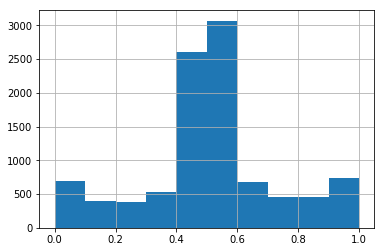

In [13]:
full_sub1['radiant_win_prob'].hist()

In [22]:
df_submission = y_test_pred#pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-17_18-58-03.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.500001
70e5ba30f367cea48793b9003fab9d38,0.774302
4d9ef74d3a2025d79e9423105fd73d41,0.755471
2bb79e0c1eaac1608e5a09c8e0c6a555,0.516492
bec17f099b01d67edc82dfb5ce735a43,0.392212
038acbb47d9eb54c11962d07cce8d829,0.094769
b891f03bb2a86d78b84043437fc95e04,0.682434
ff898afdb5bb5c7163bde45a009503f7,0.185098
72e6b1c31c718c0806f9aaeb8b7290a9,0.545804


In [43]:
df_submission.shape

(10000, 1)